<a href="https://colab.research.google.com/github/Victor0vich/Denis/blob/main/market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В значительной степени по мотивам https://habr.com/ru/post/583808/

За что спасибо Автору https://habr.com/ru/users/Zmey56/ , в профиле у Автора ещё несколько интересных постов по анализу бумаг с помощью Python!

Данные отсюда https://www.finam.ru/profile/moex-etf/finex-msci-usa-ucits-etf/export/

Видео пояснялка https://youtu.be/HYftElwAIgg


In [ ]:
# id текстового файлика на Google Drive с csv с Финама
# качаю с финама, кладу на гуглодрайв, шарю ссылку для всех
# https://drive.google.com/file/d/<ЭТО И ЕСТЬ ID>/view?usp=sharing

id = "1uUp4BFzzzzzzzzzC3yGAWOXL" # google
# !gdown --id "$id" -O data.txt # загрузка файлика, можно комментить после первой загрузки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# размеры графиков
plt.rcParams["figure.figsize"] = (20,10)

# загрузка данных из локального файла
df = pd.DataFrame( pd.read_csv("/content/data.txt"))
df['date'] = pd.to_datetime(df['<DATE>'].astype(str), format="%Y-%m-%d")
df = df.drop(['<DATE>','<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<TICKER>', '<PER>', '<VOL>'], axis=1)
df.set_index(['date'], inplace=True)

# !!! Фильтр по дате
# df = df[df.index < pd.to_datetime("2021-10-07")] # сплит FXUS
# df = df[df.index >= pd.to_datetime("2007-07-18")] # сплит СБЕР https://ria.ru/20070712/68858057.html
# df = df[df.index >= pd.to_datetime("2018-12-13")] # сплит FXRU https://www.moex.com/n21923
# df = df[(df.index >= pd.to_datetime("2010-01-01")) & (df.index <= pd.to_datetime("2020-01-01"))] # просто период

# оставляю только цену закрытия
df.columns = ['close']
df.dropna(inplace=True, axis=0)

In [ ]:
# ежедневное изменение цены закрытия, в проценнтах
df['change'] = df.close.pct_change()*100
df.dropna(inplace=True, axis=0)

In [ ]:
# для отладки
# df.shape
# %load_ext google.colab.data_table
# df

In [ ]:
# статистика по инструменту
df.describe()

,close,change
count,282.000000,282.000000
mean,161601.989362,0.196362
std,31624.407308,1.577760
min,109000.000000,-4.399449
25%,131825.250000,-0.742811
50%,156607.000000,0.178273
75%,192949.250000,0.966903
max,214277.000000,6.780256


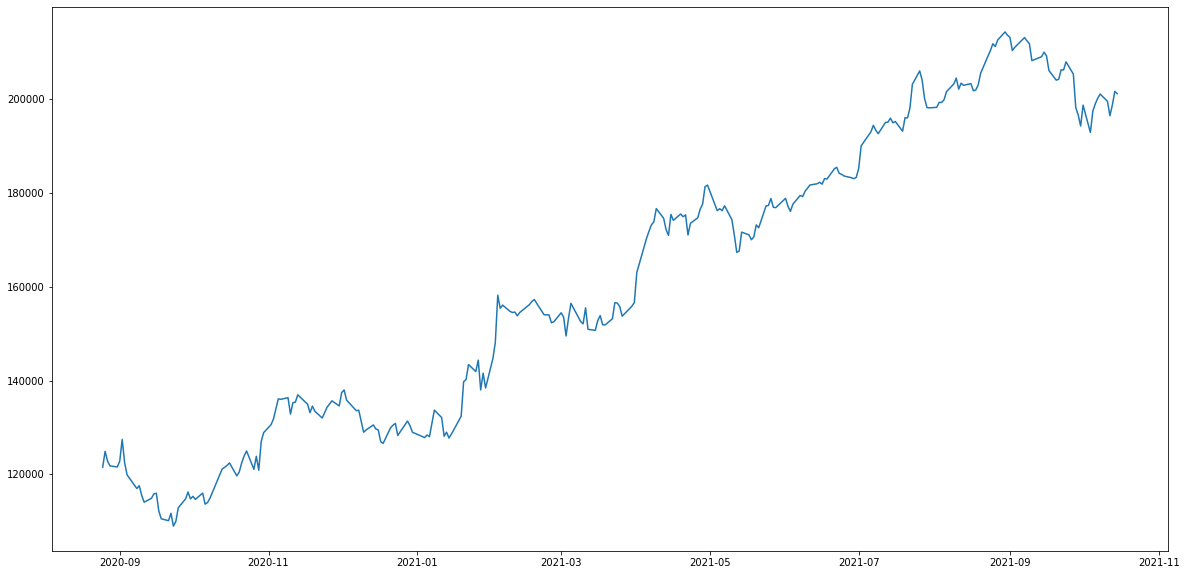

In [ ]:
# график инструмента
plt.plot(df.index, df.close, label="Close Price")
plt.show()

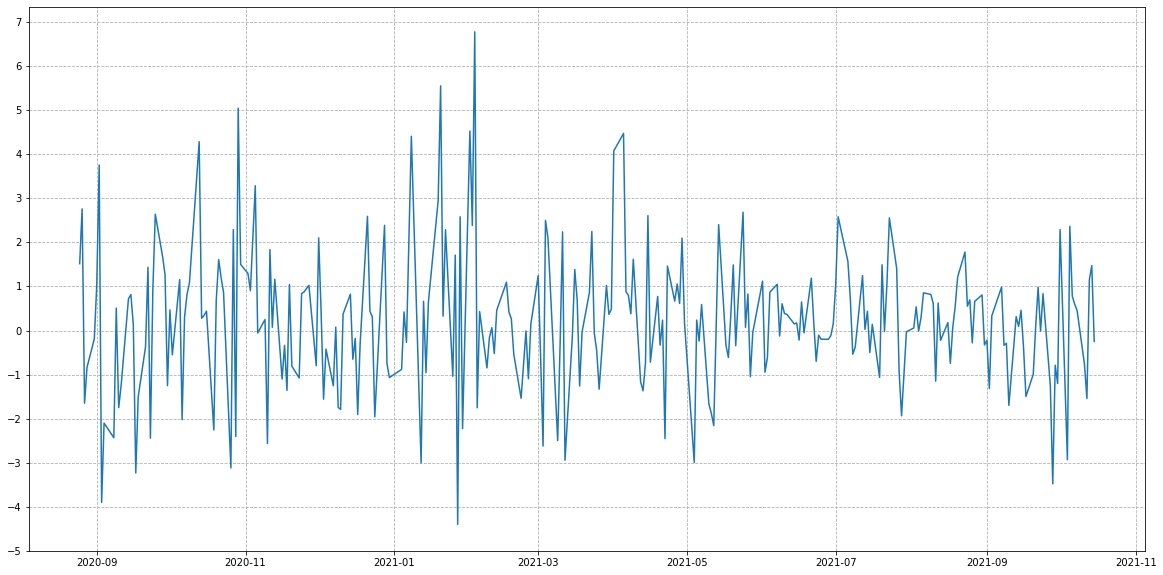

In [ ]:
# график процентного изменения цены закрытия день ко дню
plt.plot(df.index, df.change)
plt.grid(linestyle='--')
plt.yticks(np.arange(round(min(df.change)-1, 0), max(df.change)+1, 1))
plt.show()

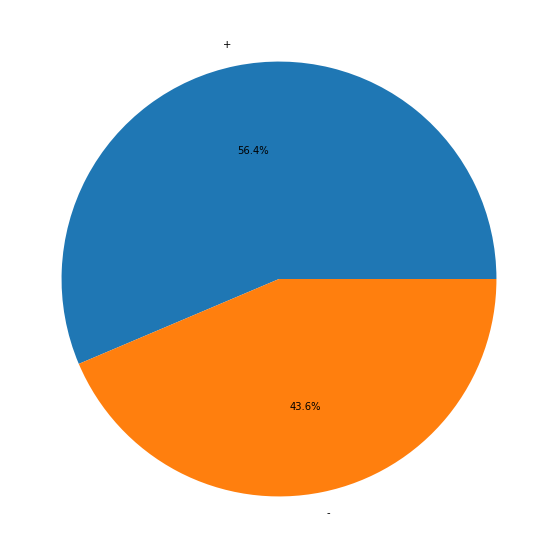

In [ ]:
# колво прибыльных/убыточных закрытий день ко дню
df['direction'] = df.change.apply(lambda x: "+" if x > 0 else "-")
plt.pie(df.direction.value_counts(), labels=df.direction.value_counts().index, autopct="%.1f%%")
plt.show()